
You can use this activity to generate and export wave shapes as svgs, see final images below.

### Instructions

Create a new blank sketch with:

```python
from py5canvas import *

def setup():
    create_canvas(800, 800)
    stroke(0)
    stroke_weight(1)
    
def draw():
    background(255)

run()
```

#### __1) Get set up__

- Below the `from py5canvas import *` add the following global variables:
    ```python
    num_wave_vertices = 50  # Number of vertices for the wave
    num_waves = 10
    ```
    - These define the number of vertices to draw for each wave and the number of waves we will draw later on in the exercise.

- **Inside** the `draw` function we will define the following variables:
    - set `wave_amplitude` to equal `height/num_waves` so our wave height will be a fraction of the height of our window, based on the number of waves we will finally draw.
    - We want our waves shapes to only be wavey on the top and to have a square bottom so we set a variable `shape_depth` to equal `wave_amplitude * 2`
   
- Now we are ready to draw one wave, inside of `draw()` and after `background` add this:

    ```python
        fill(0)
        push()
        translate(0, height/2)

        begin_shape()
            
        # Create a square bottom left corner
        vertex(0, shape_depth)
        for x in linspace(0, width, num_wave_vertices):
            vert_y = wave_amplitude
            # Add a curve vertex for each point on the wave
            vertex(x, vert_y)
        # Create a square bottom on the bottom right
        vertex(width, shape_depth)
        end_shape(CLOSE)

        pop()
    ```
    If you ran this now you would just see a black rectangle. 

#### __2) Time to compare number generators__

Inside of draw() instead of setting `vert_y` to equal `wave_amplitude` try out these three following lines to see if you can understand the difference between randomness, sin and noise. 

__Randomness:__

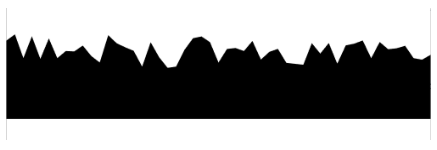

Result of code as seen in image above. Randomness, here we are getting random values between 0 to 1:

```python
    vert_y = random() * wave_amplitude
```

Try modifying the parameter of `random_seed` to see different results

__Sine:__

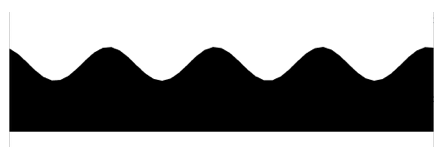

Result of code as seen in image above. Sine gives value from -1 to 1:

```python
    vert_y = sin(x * 0.05) * (wave_amplitude/2)
```

__Noise:__

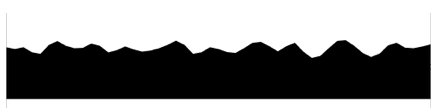

Result of code as seen in image above. Noise gives a value from 0 to 1;
```python
    vert_y = noise(x * 0.1) * wave_amplitude
```


What do we observe? `random` is giving us new random numbers every frame. This is why we see animation. We can stop the animation by using `random_seed` inside `draw`, e.g `random_seed(123)`. Let's add time into the equation for the sine & noise waves to add a more controlled form of animation.

#### __3) Let's add in time__

- Inside `draw`, create a variable `t` and set it to `frame_count * 0.01`
- Now test out first sine and then noise. Inside of the function call of `sin()` or `noise()` from the step above add `t` before `x` so it looks like this for example `noise(t + x * 0.1)`. The multiplication will happen first and then `t` is added. 

Run it each time to understand the difference between noise and sin.



#### __4) Let's get loopy__

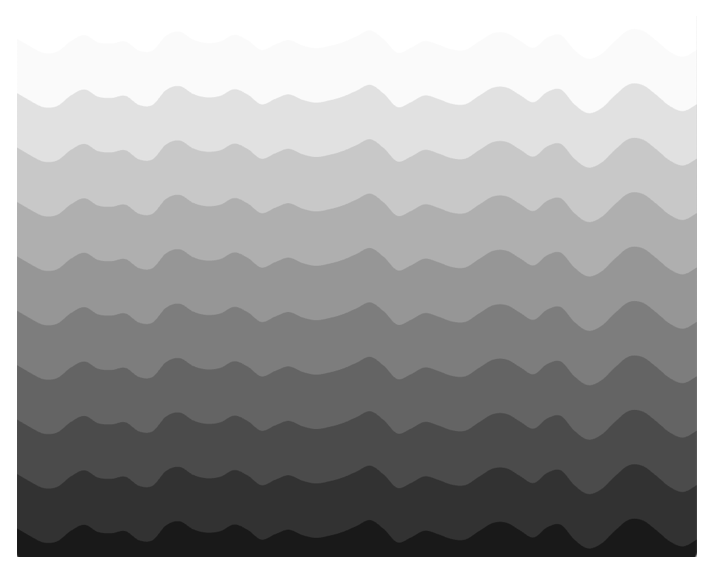

To create multiple waveforms that vertically cover the canvas as in the image above, we will need to put the code we have written so far inside an outer loop of this kind

```python
for y in linspace(0, height, num_waves):     
    # put everything we have drawn so far inside here (indented!)
```

To make it work we also need to:

- Change the drawing code so that you are doing `translate` down the y axis using `y` and not the center of the canvas.
- Inside the loop create a variable of type float called `grey_value`, set this variable to equal the result of an `remap()` where the y value is mapped from a range between `0` and `height` to a range between `250` to `0`. Note that the output range goes from a brighter value to black, so the top waves will be brighter.
- You should see the image similar to the one above if your `vert_y` is using `noise` from the step above. 

#### __5) Vary the waveforms 

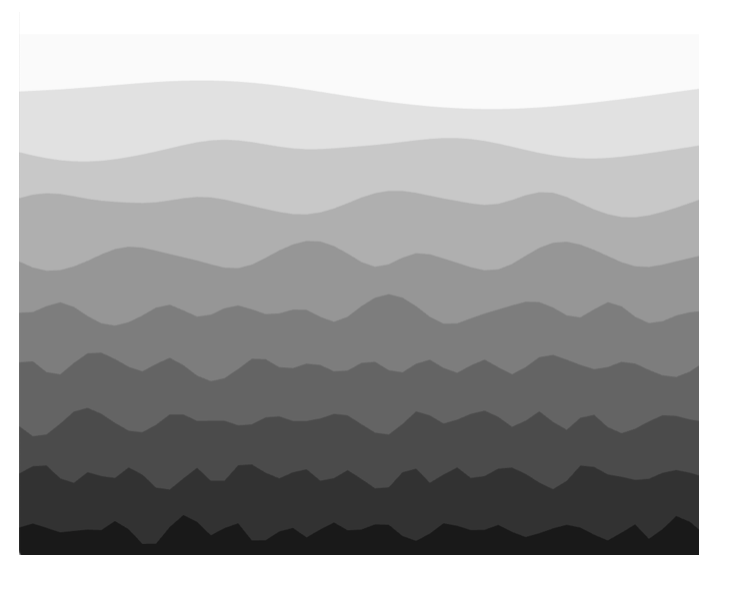

Let's use the y axis to change the quality of the look of the noise as the waves get repeated down the page so it looks like the image above.

- Let's start by creating two variables that take 'y' into consideration. Inside the first loop where we increment `y` values (not the loop that uses `x` for the wave vertices), paste these two variables above the second loop. We will need to use them inside the next loop:

    ```python
        y_resolution = y * 0.001
        y_phase = y * 0.1
    ```
- Inside of the for loop that increments `x`, we now want to take `x` into consideration so that each vertex of our wave is shifted (phased) slightly further along our wave. Add this variable:

    ```
        phase = (x * y_resolution) + y_phase
    ```
- Now adjust the value of `vert_y` inside of your second for loop so that it uses `phase` inside of the call to the `noise()` function, you should remove what we had between the round brackets, so that it is just `phase + t`

Run the code you should see the image that is at the top of this step. 



__Now let's make it interactive by using ofMap() with mouseX & mouseY:__

- Change the value of `y_resolution` so that instead of multiplying by a small number you multiply `y` by a re-mapped value where `mouse_y` is mapped from the range `0` to `height` to the range `0.0001` to `0.001`.
- Change the value of `y_phase` so that instead of multiplying by `0.1` you multiply `y` by a mapped value where `mouse_x` is mapped from the range `0` to `width` to the range `0` to `0.1`.

You can either create some new variables to store what is returned from the mapping our adjust the lines of code to use `remap`.

Run the code. Can you understand how noise is working? If you have your mouse to the top-left corner, you can see that the the waves look all similar, this is because the `y_phase` is 0 at that point, which is being used to "jump" each wave to a new point along the wave.


#### __6) Hack it so we can explore sine waves using the same variables__

Try and use the variables that we just created to change the line of code that we used to look at the sine wave. Adjust the value of `vert_y` so that it uses the sine wave function and uses the same input as we did with `noise`.

It should be able to produce things that look like this:

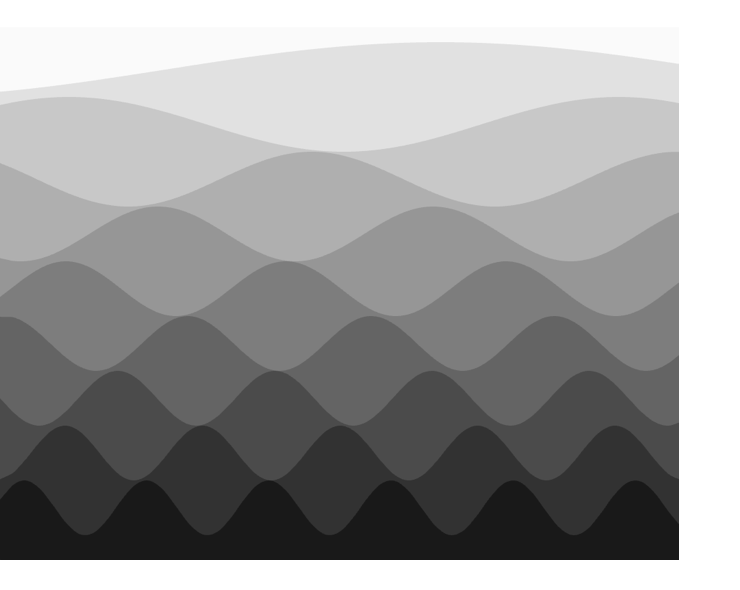

__7) Make the wave smoother__

You can easily create smoother curves replacing `vertex` with `curve_vertex` __ONLY inside the for loop__.

- __THINGS LOOKING WEIRD? DO NOT change the first and last vertices OUTSIDE of the loop to curve vertices.__ i.e. the first one under `begin_shape()` should remain an `vertex()` and the last one before `end_shape()` should remain an `vertex()`.


#### __8) Save an SVG or PDF__
As we did previously you can add keyboard input to save this as an SVG by adding this code before `run()`:

```python
def key_pressed(key):
    if key == ' ':
        save('waves.svg')
```

You can customize the name of the file as you wish.

#### __9) Convert to notebook form
At the same time, note that if you increase the number of waves, the sketch might get too slow to be practical. To compensate for this, it might be useful to convert this to a (static) notebook instead. 

To do so, make sure you import py5canvas with:


In [1]:
from py5canvas import *

Then, in order:

- Copy the global variables (these outside of the `draw` and `setup` functions)
- Copy content of the `setup()` function (without the function definition and the indentation that determines that) 
- Copy the content of the `draw()` function (without the function definition and the indentation that determines that) 
- Replace the values calculated interactively with `remap` and the mouse position with values of your choice
- Write `show()` at the end (and **not** `run())

You can try to do it in the cell below. 

In a notebook, you can always save the current canvas with:

In [ ]:
save('waves.svg')